## Linear Regression with Multiple Variables using Gradient Descent algorithm
Multivariable regression involves multiple regression parameters. The form of equation is:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 ...$$

I implemented Simple Linear Regression using vectorized notation [here](https://github.com/anujonthemove/The-World-of-Machine-Learning/blob/master/univariate-linear-regression/Linear-Regression-with-One-Variable-using-Gradient-Descent-Learning.ipynb) 
which can be easily extended to solve for parameters of multivarate linear regression using the vector form: $y=X\beta$

**Dataset:** Taken from Week 1 programming exercise from Coursera Machine Learning course. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

## Utility functions

The main algorithms (cost function and gradient descent) are vectorized implementation so that they work for both univariate and multivariate cases.

In [2]:
def computeCostMulti(X, y, theta):
    """
    computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    # number of training examples    
    m = len(y)
    
    # Method - 1: non-vectorized notation
    # J = np.sum(np.power((X.dot(theta) - y), 2))/2/m
    
    # Method - 2: vectorized notation
    error = X.dot(theta) - y
    # J = error.T.dot(error)/2/m
    J = np.true_divide(error.T.dot(error), (2*m))
    
    return J

In [3]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    updates theta by taking num_iters gradient steps with learning rate alpha
    """
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        delta = np.true_divide(X.T.dot(X.dot(theta) - y), m)
        theta = theta - alpha*delta
        J_history[iter] = computeCostMulti(X, y, theta)
    
    return theta, J_history

In [4]:
def featureNormalize(X):
    """
    does feature normalization of a given feature set
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    num_cols = X.shape[1]
    X_norm = np.zeros(shape=X.shape, dtype=float)
    
    mu = np.zeros(num_cols)
    sigma = np.zeros(num_cols)
    
    for it in range(num_cols):
        mu[it] = np.mean(X[:, it])
        sigma[it] = np.std(X[:, it])
        X_norm[:, it] = np.true_divide(np.subtract(X[:, it], mu[it]), sigma[it])
        
    return X_norm, mu, sigma

## Load data

The data set contains three columns: 
* Size of the house (in square feet) (x1)
* Number of bedrooms(x2)
* Price of the house(y)

Looking at the dataset, it can be seen that house sizes are about thousand times the number of bedrooms. Since there are only two features, this can also be seen using a 3D scatter plot below.
In cases when features differ each other by orders of magnitude, an essential step is to perform ***feature scaling*** before using the data for building a model. Gradient descent would converge quickly on scaled dataset. 

In [5]:
df = pd.read_csv('../datasets/regression/multivariate-regression/ex1data2.txt', sep=',', 
                 names = ['size_of_the_house', 'num_of_bedrooms', 'price_of_house'])
print(df.head())

   size_of_the_house  num_of_bedrooms  price_of_house
0               2104                3          399900
1               1600                3          329900
2               2400                3          369000
3               1416                2          232000
4               3000                4          539900


## Count of rows and columns

In [6]:
# rows and columns
rows, cols = df.shape
print("rows: {}".format(rows), "cols: {}".format(cols))

('rows: 47', 'cols: 3')


## Split data
Split the data set into feature vector (X_df) and target vector (y_df)

In [7]:
# train and taget values
X_df = df.iloc[:, 0:2]
y_df = df.iloc[:, 2:3]

# converting data to numpy arrays
X = np.array(X_df)
y = np.array(y_df)

## Histogram of feature values
From the histogram, it is clear that there is a huge difference in scale between the variables. So, the next step is to perform feature scaling.

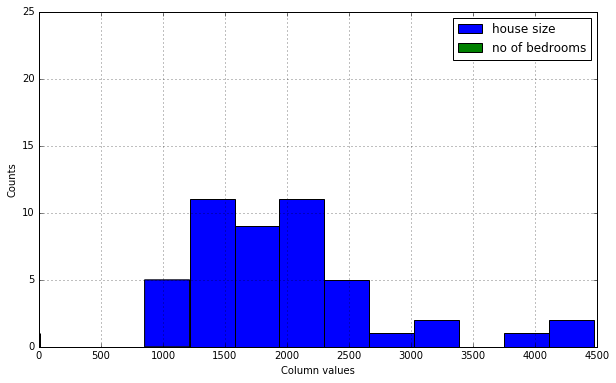

In [8]:
# Create grid coordinates for plotting 
fig = plt.figure(figsize=(10, 6)) 

# ax1 = fig.add_subplot(1, 2, 1, projection='3d') 
ax1 = fig.add_subplot(1, 1, 1) 

# histogram to visualize dataset values
ax1.grid()
plot = plt.hist(X[:, 0], label='house size')
plot = plt.hist(X[:, 1], label='no of bedrooms')
plt.xlabel('Column values')
plt.ylabel('Counts')
plot = plt.legend()

## Feature normalization
When I was performing feature scaling, I thought "***is it necessary to scale the target value in addition to scaling features?***". On reading this [QA on Cross Validated](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re) I think it is not.

In [9]:
X_norm, mu, sigma = featureNormalize(X);
X = np.copy(X_norm)

## Histogram of normalized features
On plotting the histogram of normalized values it can be seen that both feature values have come on to the same scale. We can now proceed for gradient descent.

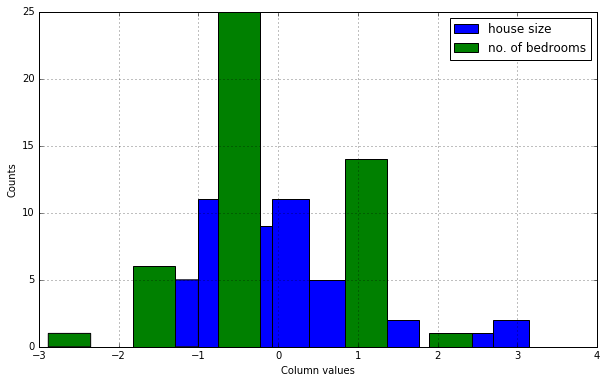

In [10]:
# Create grid coordinates for plotting 
fig = plt.figure(figsize=(10, 6)) 

# ax1 = fig.add_subplot(1, 2, 1, projection='3d') 
ax1 = fig.add_subplot(1, 1, 1) 

# histogram to visualize dataset values
ax1.grid()
plot = plt.hist(X[:, 0], label='house size')
plot = plt.hist(X[:, 1], label='no. of bedrooms')
plt.xlabel('Column values')
plt.ylabel('Counts')
plot = plt.legend()

In [11]:
# Adding intercept term
X = np.insert(X, 0, 1, axis=1)
# quitessential step
y = y.flatten()

# initializing theta with zero values
theta = np.zeros(X.shape[1])
# theta = np.array([0, 0, 0])

In [12]:
computeCostMulti(X, y, theta)

65591548106.457443

## Gradient descent
Calculating theta values and plotting the cost per iteration. The plot clearly shows that the cost goes down with iterations and at the end we have optimum values for theta for which the cost is minimum.

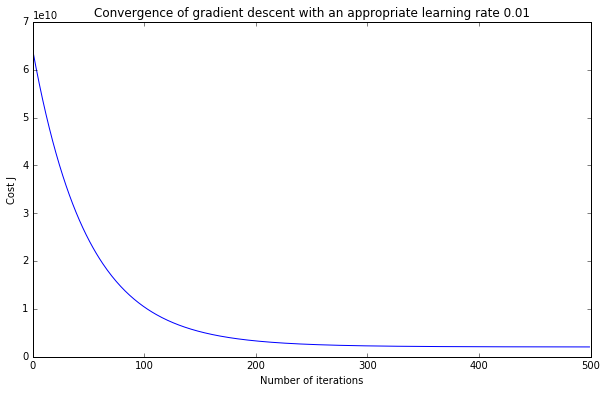

In [13]:
alpha = 0.01
iterations = 500
plt.figure(figsize=(10, 6))

theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)
plt.plot(J_history)
plt.title('Convergence of gradient descent with an appropriate learning rate 0.01')
plt.ylabel('Cost J')
plt.xlabel('Number of iterations');

## Prediction
Finally, let's make some predictions for a test dataset. 

In [14]:
# Predict values for population sizes of 35,000 and 70,000
th = 10000
X_test = np.array([[ 1., 1.31,  -0.260], [ 1.0, 0.15,  -0.326]])

# X_test.shape
rows = X_test.shape[0]
for it in range(rows):
    prediction = X_test[it].dot(theta)
    print("For normalized values of size of house {}, its predicted price is ${:f}".format(int(X_test[it][1]*th), float(prediction)))

For normalized values of size of house 13100, its predicted price is $473200.671400
For normalized values of size of house 1500, its predicted price is $353696.760643


## What is remaining?

On researching a bit, I realized that linear regression is a much more involved topic than just a bunch of formulas covered in this notebook. 

I am yet to learn and add some of the concepts/ideas related to linear regression:

* How to decide when and where linear models are to be used?
* Assumptions of linear regression
* Confidence intervals
* p-values 
* Hypothesis testing 
* goodness of fit (using r-squared)
* Q-Q plot
* Finally, interpreting the output of linear regression